In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split, cross_val_score, validation_curve
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('copper-new.txt', sep="  ", header=None)
copper = np.loadtxt('copper-new.txt')

In [20]:
x = np.array(df[1]).reshape((-1, 1))
y = np.array(df[0]).reshape((copper.shape[0],1))
x,y

(array([[ 24.41],
        [ 54.98],
        [ 89.57],
        [114.26],
        [133.61],
        [202.14],
        [250.99],
        [321.31],
        [333.47],
        [373.79],
        [422.02],
        [447.41],
        [522.47],
        [549.53],
        [ 20.15],
        [ 39.12],
        [ 73.42],
        [134.03],
        [179.86],
        [262.52],
        [337.23],
        [432.68],
        [253.24],
        [346.62],
        [450.1 ],
        [552.22],
        [656.2 ],
        [ 33.84],
        [ 60.41],
        [ 94.88],
        [147.73],
        [206.76],
        [237.12],
        [372.72],
        [495.47],
        [544.47],
        [ 28.93],
        [ 49.87],
        [ 85.15],
        [143.84],
        [226.86],
        [339.15],
        [393.32],
        [524.7 ],
        [623.86],
        [ 39.22],
        [ 96.44],
        [156.92],
        [223.88],
        [271.78],
        [349.52],
        [429.66],
        [523.03],
        [622.05],
        [748.29],
        [6

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, 
                                                    random_state = 0, shuffle=True)

In [5]:
x_train = x_train.reshape((-1, 1))
x_test = x_test.reshape((-1, 1))

### Q1 Perform linear regression on the data.

In [6]:
LR_model = LinearRegression(normalize=True)

In [7]:
LR_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:
print('intercept:', LR_model.intercept_)
print('slope:', LR_model.coef_)
print('fitted model is y_pred = ', LR_model.intercept_ ,'+', LR_model.coef_ ,'* x')

intercept: 6.895498364956336
slope: [0.02175325]
fitted model is y_pred =  6.895498364956336 + [0.02175325] * x


In [9]:
m = len(y_test) 
y_LR_pred = LR_model.predict(x_test)
LR_mse = np.sum((y_LR_pred - y_test)**2)/m
LR_rmse = np.sqrt(LR_mse/m)
print('Linear Regression MSE :', LR_mse, "And Linear Regression RMSE:", LR_rmse)

Linear Regression MSE : 5.30327551104999 And Linear Regression RMSE: 0.5946021365052988


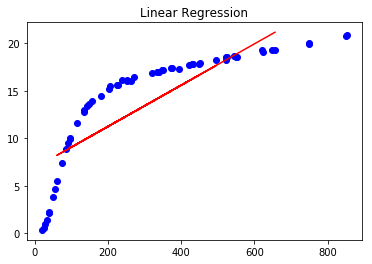

In [10]:
plt.scatter(x, y, color = 'blue') 
plt.plot(x_test, y_LR_pred, color = 'red') 
plt.title('Linear Regression')
plt.show() 

### Q2 Perform nonlinear regression with polynomial regression function up to degree n = 10 and use ridge regression.  Write down your formulation and strategy for doing this, the form of the ridge regression.

In [11]:
from sklearn.preprocessing import PolynomialFeatures 

In [48]:
deg = 10
k = 5
params = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 1e-1, 1, 5, 10, 20, 100] }
RR_best_params = []
RR_best_mse = []
for i in range (1, deg+1):
    poly_model = PolynomialFeatures(degree = i)
    x_poly = poly_model.fit_transform(x)
    ridge = Ridge(normalize = True)
    RR_Model = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=k)
    RR_Model.fit(x_poly, y)
    RR_best_params.append([RR_Model.best_params_['alpha']])
    RR_best_mse.append([RR_Model.best_score_])
    print('degree:', i, 'best alpha:', RR_Model.best_params_['alpha'])
    print('degree:', i, 'best mse:', -RR_Model.best_score_) #Since it is neg-mean-squared-error



degree: 1 best alpha: 0.1
degree: 1 best mse: 13.343066589560786
degree: 2 best alpha: 0.01
degree: 2 best mse: 7.937543182537135
degree: 3 best alpha: 0.1
degree: 3 best mse: 8.620154435649107
degree: 4 best alpha: 1e-05
degree: 4 best mse: 4.698262968235155
degree: 5 best alpha: 1e-08
degree: 5 best mse: 0.8366130080966973
degree: 6 best alpha: 1
degree: 6 best mse: 18.469302934123892
degree: 7 best alpha: 1e-05
degree: 7 best mse: 5.1689039476079195
degree: 8 best alpha: 1e-10
degree: 8 best mse: 0.4858705059274393
degree: 9 best alpha: 0.1
degree: 9 best mse: 10.18670629260628
degree: 10 best alpha: 0.1
degree: 10 best mse: 10.235292282398323


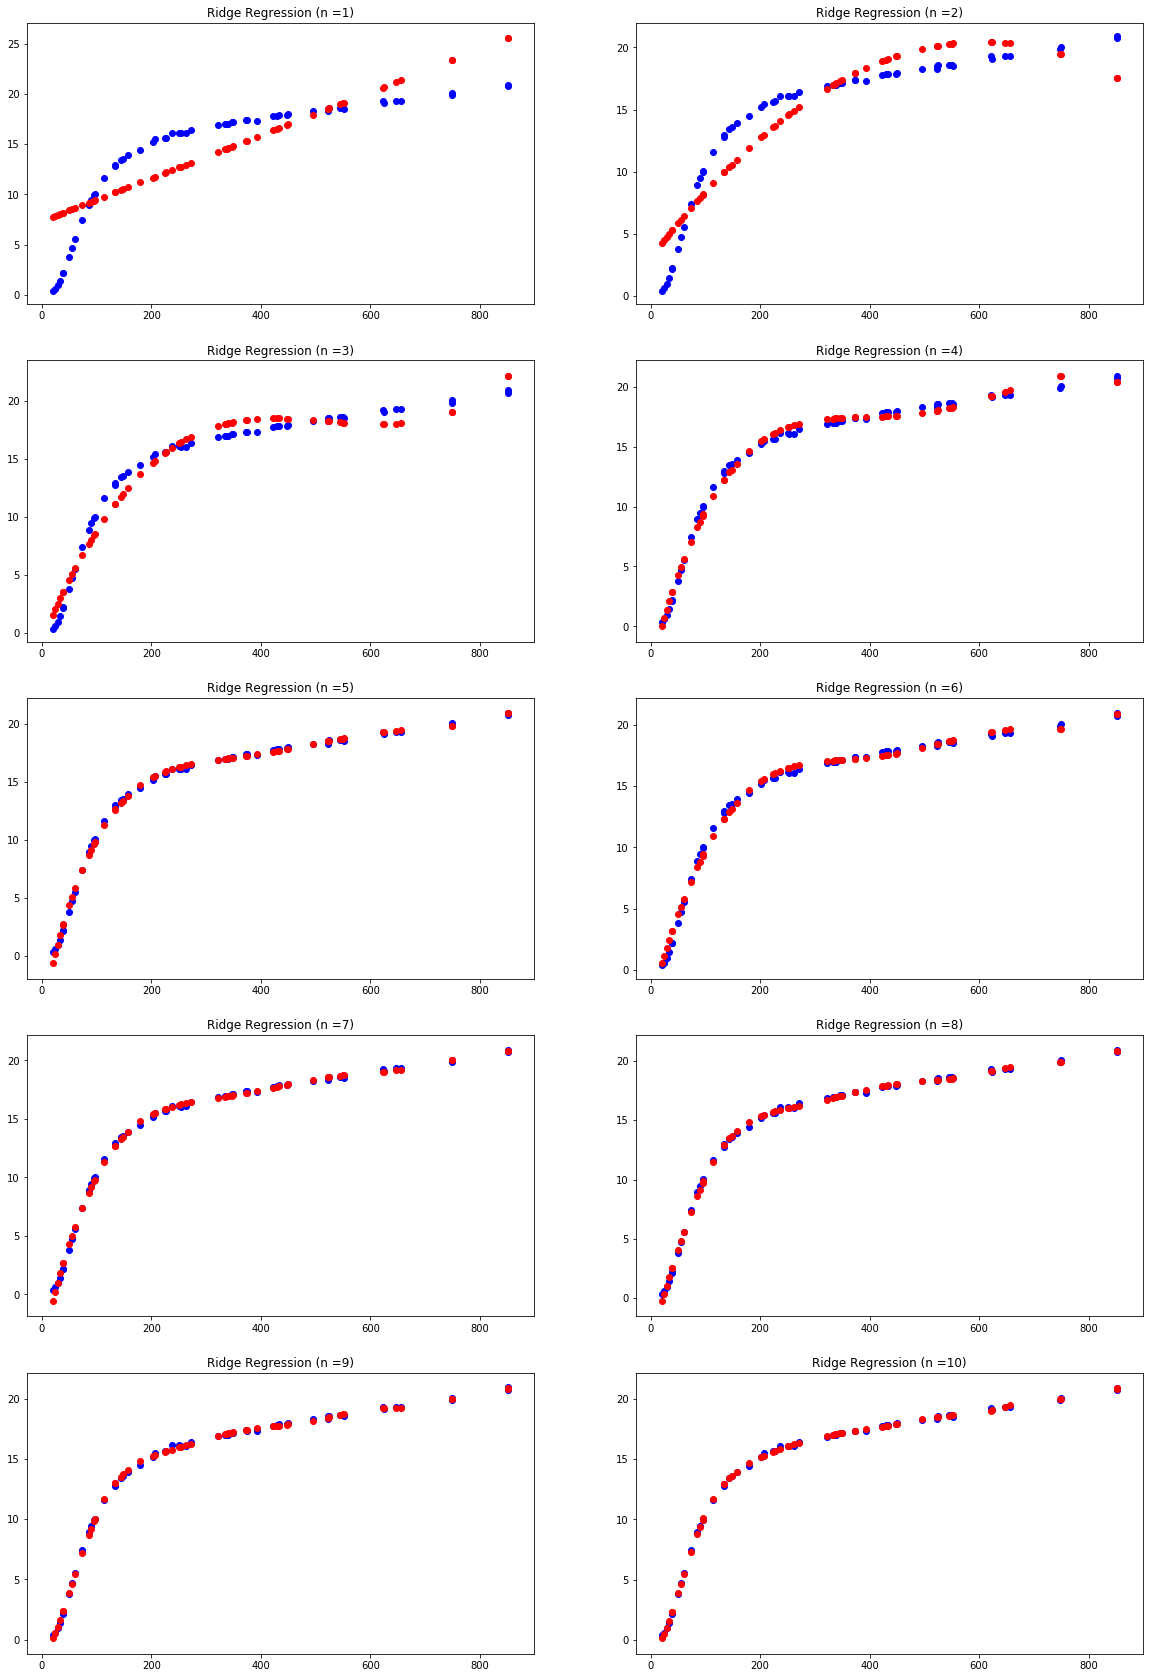

In [49]:
plt.figure(figsize=(20,30))
xx= np.linspace(0,850,600).reshape((600,1))
for j in range(1, len(RR_best_params)+1):
    RR_y_pred = []
    poly_model = PolynomialFeatures(degree = j) 
    x_poly = poly_model.fit_transform(x)
    RR_Model = Ridge(fit_intercept = False, alpha=RR_best_params[j-1])
    RR_Model.fit(x_poly, y)
        

    for k in x:
        x_bar = np.array([k]).reshape(1, -1)
        x_bar_poly = poly_model.fit_transform(x_bar) 
        RR_y_pred.append(RR_Model.predict(x_bar_poly)[0]) 
        

    # Plot actual data
    plt.subplot(5,2,j)
    plt.scatter(x,y,  color = 'blue')
    plt.scatter(x,RR_y_pred, color = 'red')
    title_text = 'Ridge Regression (n ='+str(j) + ')'
    plt.title(title_text)
plt.show() 


Since the mse of the model with degree :8 is the lowest, I chose degree = 8 as an optimal order, and the optimal alpha = 1e-10

In [60]:
opt_poly_model = PolynomialFeatures(degree = 8) 
opt_x_poly = poly_model.fit_transform(x) 
opt_RR_Model = Ridge(alpha=1e-10, normalize = True)
opt_RR_Model.fit(opt_x_poly, y)

print(opt_RR_Model.coef_)

[[ 0.00000000e+00  1.90033666e-01 -2.84876822e-04 -3.34713201e-06
   1.98886279e-08 -4.88741154e-11  6.29335858e-14 -4.17046001e-17
   1.12398307e-20]]


### Use 5 fold cross validation to select the optimal regularization parameter lambda. Plot the cross validation curve and report the optimal lambda.

alpha: 1e-15
Ridge Regression MSE: 0.03884649654276564
Ridge Regression MSE: 0.10720581023715105
Ridge Regression MSE: 0.0640241071223611
Ridge Regression MSE: 811.770332760107
Ridge Regression MSE: 0.016477602463848197
alpha: 1e-10
Ridge Regression MSE: 0.03751085636385653
Ridge Regression MSE: 0.16637256959947164
Ridge Regression MSE: 0.07422948879547664
Ridge Regression MSE: 17.139313694190697
Ridge Regression MSE: 0.043525180656816556
alpha: 1e-08
Ridge Regression MSE: 0.04388943375509651
Ridge Regression MSE: 0.17839532792562537
Ridge Regression MSE: 0.07650016920318231
Ridge Regression MSE: 24.923840145680888
Ridge Regression MSE: 0.059738218400507415
alpha: 1e-05
Ridge Regression MSE: 0.270080617471173
Ridge Regression MSE: 0.17165161008432872
Ridge Regression MSE: 0.18096114590539625
Ridge Regression MSE: 17.313866097697144
Ridge Regression MSE: 0.21602298208735762
alpha: 0.01
Ridge Regression MSE: 2.3744279695274906
Ridge Regression MSE: 4.249131765134432
Ridge Regression MSE:

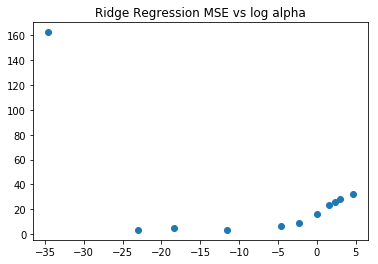

In [56]:
K_fold = KFold(n_splits= 5, shuffle=True, random_state=0)

RR_mse = []

for i in params['alpha']:
    print('alpha:', i)
    CV_mse = [] 
    RR_Model_CV = Ridge(alpha=i, normalize = True)

    for CV_train, CV_test in K_fold.split(x):
        x_CV_train, x_CV_test = x[CV_train], x[CV_test]
        y_CV_train, y_CV_test = y[CV_train], y[CV_test]
        x_CV_train_poly = poly_model.fit_transform(x_CV_train) 
        x_CV_test_poly = poly_model.fit_transform(x_CV_test)
        RR_Model_CV.fit(x_CV_train_poly, y_CV_train)
        y_CV_pred = RR_Model_CV.predict(x_CV_test_poly)
        mse = mean_squared_error(y_CV_test, y_CV_pred)
        print('Ridge Regression MSE:', mse)
        CV_mse.append(mse)
    RR_mse.append(np.mean(CV_mse))
    
plt.scatter(np.log(params['alpha']), RR_mse)
plt.title('Ridge Regression MSE vs log alpha')
plt.show()

Optimal alpha = 1e-10

### Predict the coefficient at 400 degree Kelvin using both models. Comment on how would you compare the accuracy of predictions.

In [61]:
#Linear Regression
Check = 400
x_check = np.array([Check]).reshape(1,-1)
LR_pred = LR_model.predict(x_check)[0]
print("Linear Regression predicted coefficent is ", LR_pred)
# Polynomial Regression (n=8)
x_check_poly = opt_poly_model.fit_transform(x_check)
RR_pred = opt_RR_Model.predict(x_check_poly)[0]
print("Polynomial Regression with ridge regression predicted coefficent is ", RR_pred)


Linear Regression predicted coefficent is  15.596796894613185
Polynomial Regression with ridge regression predicted coefficent is  [17.5102106]


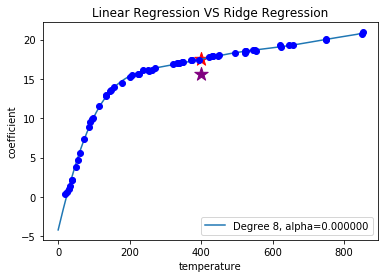

In [70]:
xx= np.linspace(0,850,600).reshape((600,1))
plt.plot(xx, opt_RR_Model.predict(PolynomialFeatures(degree= 8).fit_transform(xx)), label="Degree %d, alpha=%f" %(8,1e-10 ))
plt.scatter([400], LR_pred, c='purple', marker='*', s=200) 
plt.scatter([400], RR_pred, c='red', marker='*', s=200) 
plt.legend(loc = 'lower right')
plt.plot(x,y, 'bo')
plt.xlabel('temperature')
plt.ylabel('coefficient')
plt.title('Linear Regression VS Ridge Regression')
plt.show()